### Chutes and Ladders Analysis - A Completely Luck-based Game

So it turns out that the Chutes and Ladders game I remember from childhood is actually based on an ancient Indian game known as Moksha Patam and was brought to the UK in the 1890s. In the original game, the chutes were replaced by snakes, but the game play was largely the same. Players advance according to die rolls and try to move from the bottom to the top. 

Even the original version had its foundations in morality lessons where ladders that allow the player to advance faster represent different virtues, while snakes, which set the player back, represent different vices. Despite its morality foundation, the game is *completely luck based* as there is no way to increase the probability of hitting ladders, regardless of a player's moral character. 

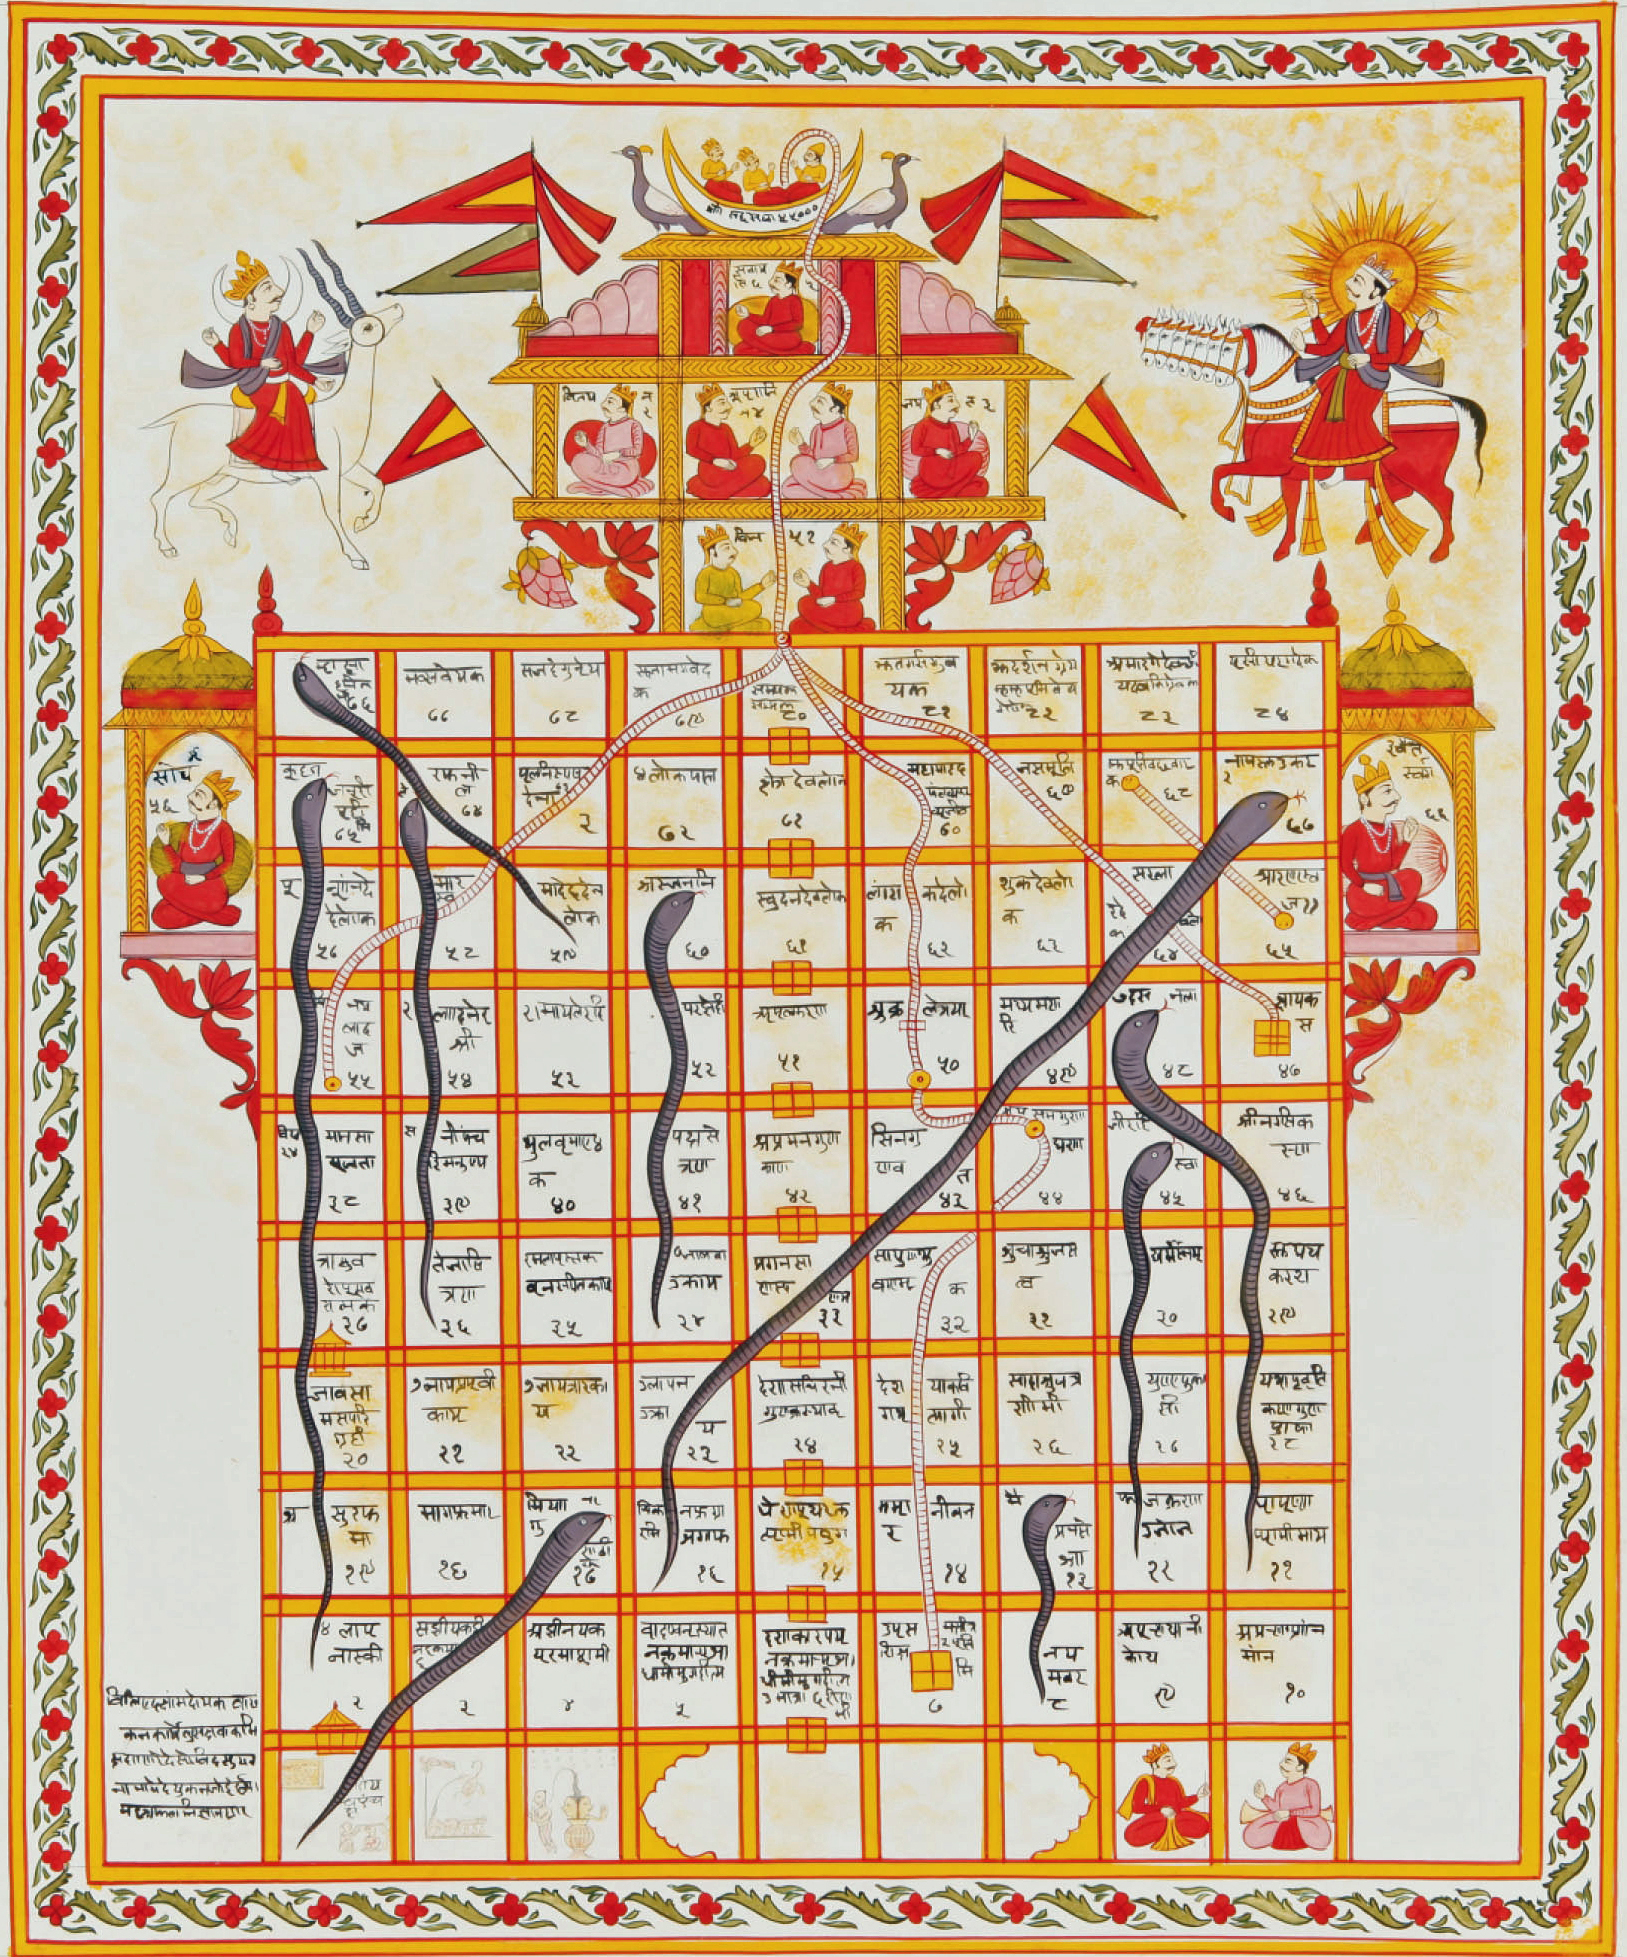

[From Wikipedia Commons](https://upload.wikimedia.org/wikipedia/commons/a/a7/Snakes_and_Ladders.jpg)

Chutes and Ladders is ideal for simulation given its status as a completely luck based game. After simulating 10K games, I wanted to answer the following question:
* What square(s) are players *most* likely to end their turn on?

In [1]:
# imports

#standard
import pandas as pd
#import random
from datetime import datetime
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Formating

#plr formats
plt.rcParams['figure.figsize'] = [20,12]

# pandas outupt
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 100)

#px.colors.DEFAULT_PLOTLY_COLORS

# '#1f77b4',  // muted blue
# '#ff7f0e',  // safety orange
# '#2ca02c',  // cooked asparagus green
# '#d62728',  // brick red
# '#9467bd',  // muted purple
# '#8c564b',  // chestnut brown
# '#e377c2',  // raspberry yogurt pink
# '#7f7f7f',  // middle gray
# '#bcbd22',  // curry yellow-green
# '#17becf'   // blue-teal

In [3]:
df = pd.read_csv('10000_chutes_n_ladders_games_simulated_2024-08-27.csv',index_col = 0)
df.drop(columns = 'index',inplace=True)

In [4]:
df.head()

turn  die_value  position_start  position_end  game
0     1          2               1             3     1
1     2          6               3            31     1
2     3          6              31            37     1
3     4          4              37            41     1
4     5          5              41            46     1

In [5]:
#Add Labels for the end positions that are Chutes or Ladders respectively 

chutes = [6,26,11,53,19,60,73,75,78]

chutes_mapping = pd.DataFrame(chutes, columns = ['values'])
chutes_mapping['map'] = 'Chutes'

ladders = [38, 14, 31, 42, 84, 44, 67, 91, 100]

ladders_mapping = pd.DataFrame(ladders, columns = ['values'])
ladders_mapping['map'] = 'Ladders'

color_mapping = pd.concat([chutes_mapping, ladders_mapping])

In [6]:
position_end_hist = df.groupby(by='position_end',as_index=False).count()

In [7]:
position_end_hist = position_end_hist = position_end_hist.merge(
    color_mapping, 
    left_on='position_end',    
    right_on='values',         
    how='left')

In [8]:
position_end_hist = position_end_hist[['position_end','game','map']].copy()

position_end_hist.rename(columns = {"game": "frequency"},  
          inplace = True) 

position_end_hist['map'].fillna('None',inplace=True)

In [9]:
position_end_hist.head()

position_end  frequency     map
0             2       1646    None
1             3       1923    None
2             5       2366    None
3             6       7084  Chutes
4             7       3754    None

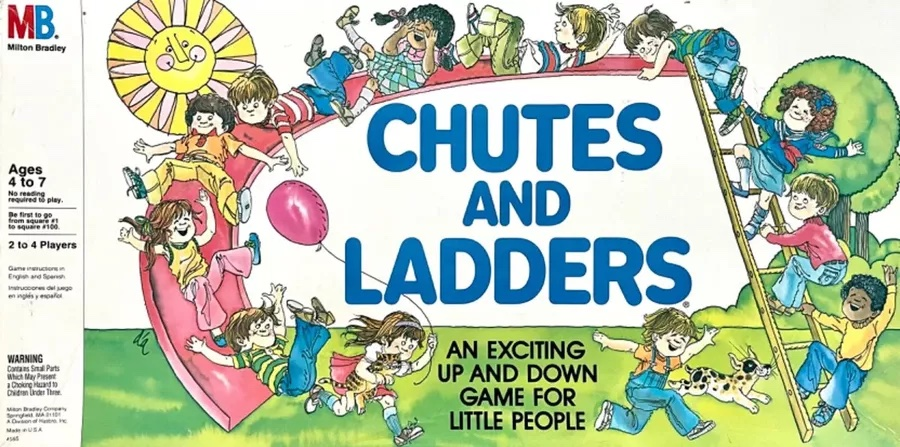

[Picture from Boardgame Geek](https://boardgamegeek.com/image/8203150/chutes-and-ladders). 

The Milton Bradley version has an abysmal 2.9 score.

In [10]:
# Visualizations

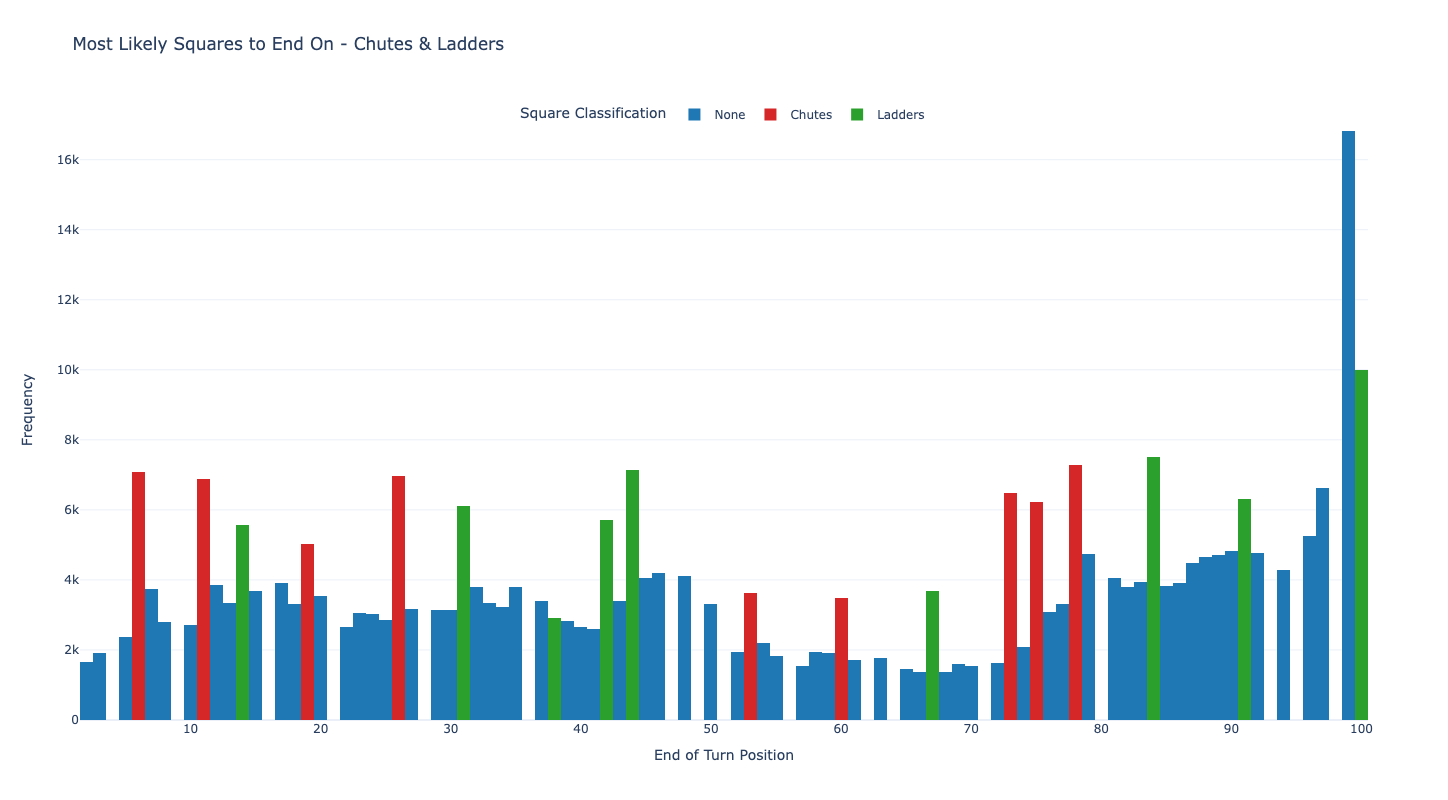

In [11]:
fig_hist = px.histogram(position_end_hist, 
                        x="position_end",
                       y='frequency',
                        color = 'map',
                        color_discrete_map={'None':'#1f77b4',
                                            'Chutes':'#d62728', 
                                            'Ladders':'#2ca02c'},
                        title = 'Most Likely Squares to End On - Chutes & Ladders',
                       nbins=100,
                       template="plotly_white",
                       labels={'map': 'Square Classification'})

fig_hist.update_xaxes(title_text="End of Turn Position")
fig_hist.update_yaxes(title_text="Frequency")

fig_hist.update_layout(
    width=1200,
    height=800,
    legend=dict(
        orientation="h", 
        x=0.5,  # position the legend horizontally (0 to 1)
        y=1,    # position the legend vertically (0 to 1)
        xanchor='center',  # anchor the center of the legend box to the x position
        yanchor='top')
)

fig_hist.show()

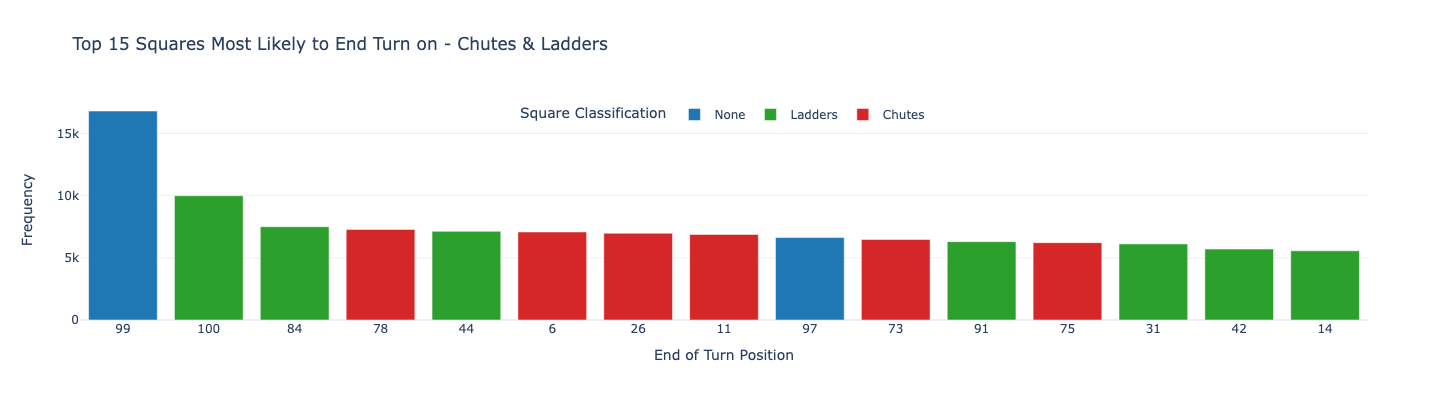

In [12]:
fig_bar = px.bar(position_end_hist.sort_values(by='frequency',ascending = False).head(15),
                 x='position_end',
                 y='frequency',
                 color='map',
                 color_discrete_map={'None':'#1f77b4',
                                            'Chutes':'#d62728', 
                                            'Ladders':'#2ca02c'},
                title = 'Top 15 Squares Most Likely to End Turn on - Chutes & Ladders',
                                template="plotly_white",
                labels={'map': 'Square Classification'})

fig_bar.update_xaxes(type='category')
fig_bar.update_layout(xaxis_categoryorder = 'total descending')

fig_bar.update_layout(
    width=1200,
    height=400,
    legend=dict(
        orientation="h", 
        x=0.5,  # position the legend horizontally (0 to 1)
        y=1,    # position the legend vertically (0 to 1)
        xanchor='center',  # anchor the center of the legend box to the x position
        yanchor='top')
)

fig_bar.update_xaxes(title_text="End of Turn Position")
fig_bar.update_yaxes(title_text="Frequency")

fig_bar.show()

Observations from Data Visualizations:
* The most likely square for a player to end their turn on is position 99. In the rules I used, a player needs to land exactly on 100 to finish the game meaning they could get stuck in "99 limbo" while waiting to roll a 1 to finish the game
    * 97 also turns out to be popular end of turn position while waiting attempting to reach 100 
* The second most frequent end of turn position is 100 which has two drivers: 
    1) Players *finish* the game on square 100 as a win condition
    2) There is a ladder on square 80 that advances the player to square 100, which also ends the game
* After that, there is a pretty even mix of both Ladders (7) and Chutes (6) ending positions. With the ability to advance and slide depending on the luck of the die (sometimes for multiple tries), it isn't surprising that both the ups and downs are represented.